In [1]:
# ingest the data

In [3]:
import pandas as pd

## About Dataset
This data set is a collection for information about various mobile phone type .

The columns available in the dataset are:-

* `Ratings` : This field contains the various rating given by customers
* `Ram` : This field contain the Ram capacity of the phone in GB
* `ROM` : This is field contains the number of space available in the phone in GB
* `Mobile_Size` : This is the int size of the screen
* `Primary_Cam` : This is the number of pixels of the Back camera
* `Selfi_Cam` : The number of Pixels of the front camera
* `Battery_Power`: The battery power

## Target variable:
* `Price`: The price of the mobile phone in INR(indian Rupees)
All the fields are already in numerical values either int of float


`Dataset Source Link` :
[https://www.kaggle.com/datasets/ganjerlawrence/mobile-phone-price-prediction-cleaned-dataset?resource=download](https://www.kaggle.com/datasets/ganjerlawrence/mobile-phone-price-prediction-cleaned-dataset?resource=download)


## EDA starts here

In [100]:
data = pd.read_csv(r"data/data.csv")

In [5]:
data.head()

,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
0,4.3,4.0,128.0,6.00,48,13.0,4000,24999
1,3.4,6.0,64.0,4.50,48,12.0,4000,15999
2,4.3,4.0,4.0,4.50,64,16.0,4000,15000
3,4.4,6.0,64.0,6.40,48,15.0,3800,18999
4,4.5,6.0,128.0,6.18,35,15.0,3800,18999


In [6]:
data.sample(5)

,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
161,3.4,6.0,32.0,4.77,48,8.0,3500,735
702,3.5,6.0,64.0,4.50,48,20.0,3000,1199
318,3.0,8.0,64.0,4.54,48,8.0,3800,899
612,4.4,12.0,25.0,6.44,48,13.0,4440,44990
311,3.8,6.0,32.0,4.70,64,8.0,3500,3999


In [7]:
data.tail()

,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
802,3.8,6.0,32.0,4.54,48,12.0,2800,1299
803,4.1,8.0,64.0,4.54,64,8.0,2500,1390
804,4.4,3.0,32.0,6.20,48,1.0,3800,9790
805,3.7,10.0,32.0,4.50,64,8.0,3500,799
806,3.5,6.0,32.0,4.50,64,15.0,1050,799


In [8]:
data.isnull().sum()

Ratings          0
RAM              0
ROM              0
Mobile_Size      0
Primary_Cam      0
Selfi_Cam        0
Battery_Power    0
Price            0
dtype: int64

In [9]:
data.dropna(inplace=True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 807 entries, 0 to 806
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Ratings        807 non-null    float64
 1   RAM            807 non-null    float64
 2   ROM            807 non-null    float64
 3   Mobile_Size    807 non-null    float64
 4   Primary_Cam    807 non-null    int64  
 5   Selfi_Cam      807 non-null    float64
 6   Battery_Power  807 non-null    int64  
 7   Price          807 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 50.6 KB


In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Ratings,807.0,4.112639,0.367830,2.8,3.9,4.10,4.4,4.8
RAM,807.0,5.941760,2.056359,0.0,6.0,6.00,6.0,12.0
ROM,807.0,64.390335,53.868626,2.0,32.0,32.00,64.0,256.0
Mobile_Size,807.0,5.620660,3.957409,2.0,4.5,4.77,6.3,44.0
Primary_Cam,807.0,47.821561,11.155916,5.0,48.0,48.00,48.0,64.0
Selfi_Cam,807.0,8.868649,4.547254,0.0,8.0,8.00,12.0,23.0
Battery_Power,807.0,3278.859975,937.628801,1020.0,3000.0,3000.00,3800.0,6000.0
Price,807.0,14269.167286,23092.739983,479.0,984.0,1699.00,18994.5,153000.0


In [12]:
data.duplicated().sum() 

264

In [13]:
data.drop_duplicates(inplace=True)

In [14]:
data.shape

(543, 8)

In [15]:
#cat and num columns

categorical = data.select_dtypes(include='object').columns

In [16]:
numerical = data.select_dtypes(exclude='object').columns

In [17]:
numerical

Index(['Ratings', 'RAM', 'ROM', 'Mobile_Size', 'Primary_Cam', 'Selfi_Cam',
       'Battery_Power', 'Price'],
      dtype='object')

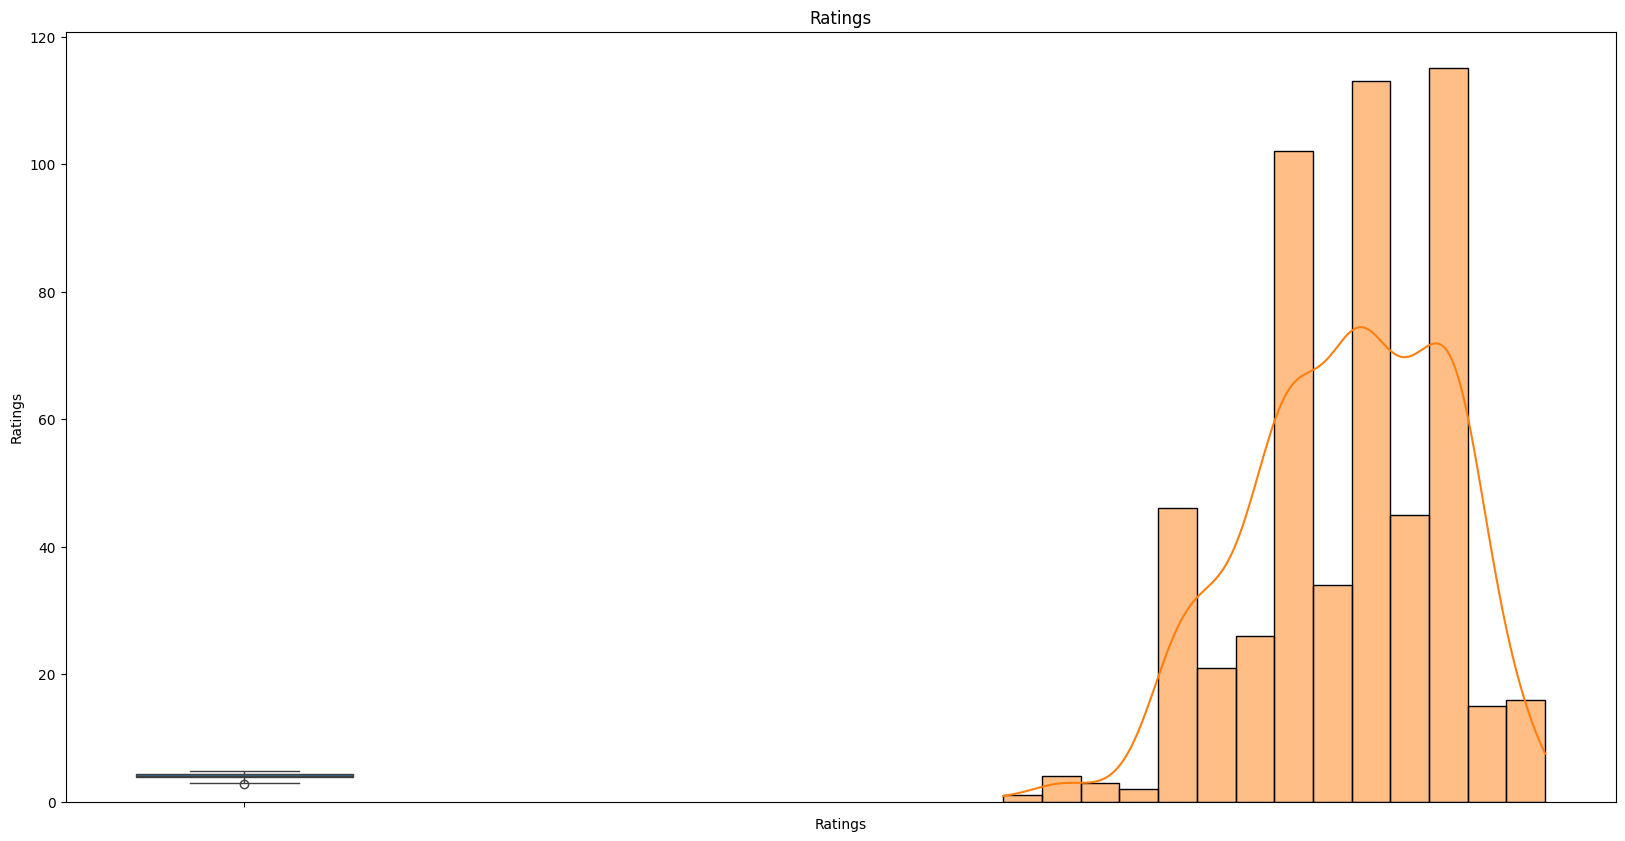

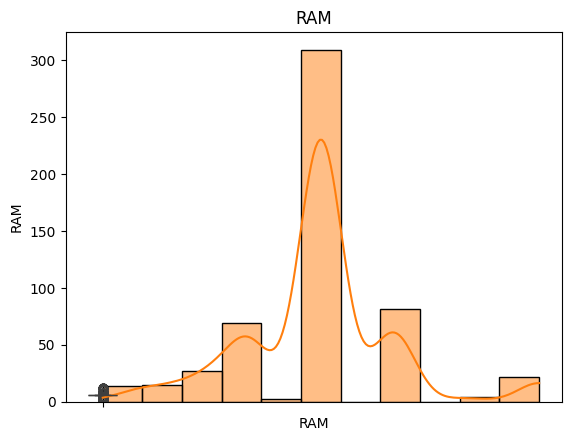

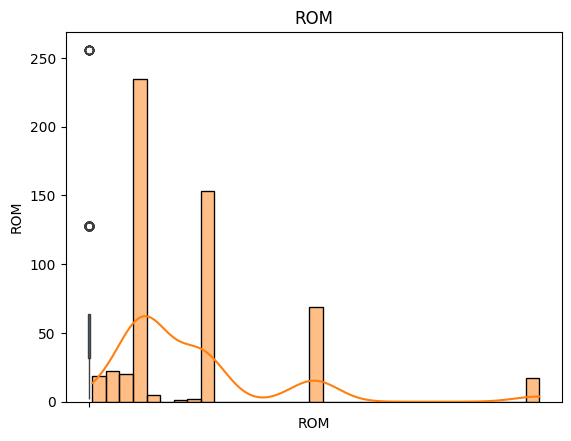

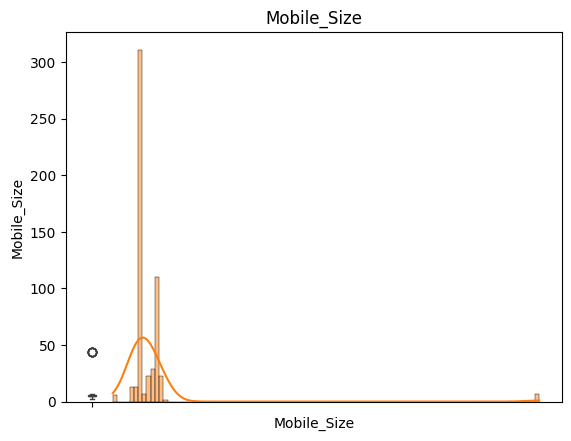

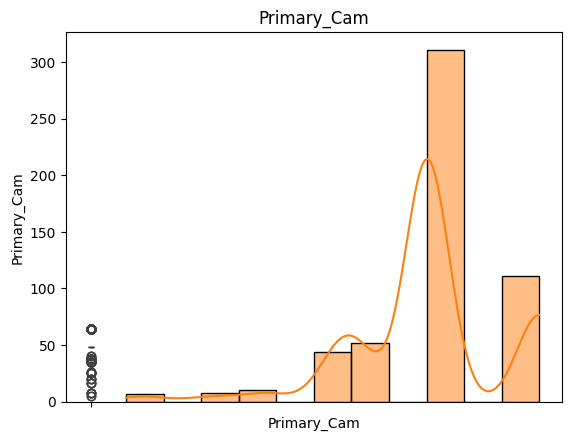

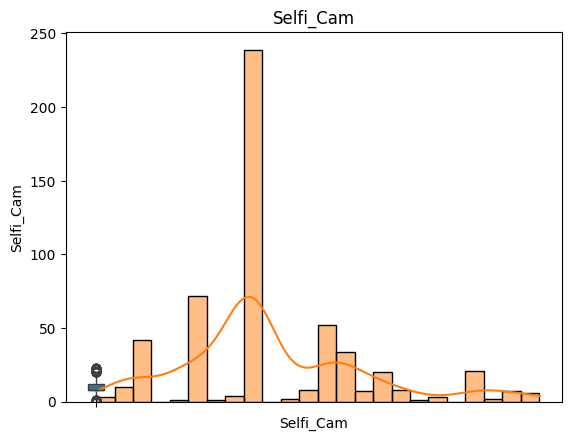

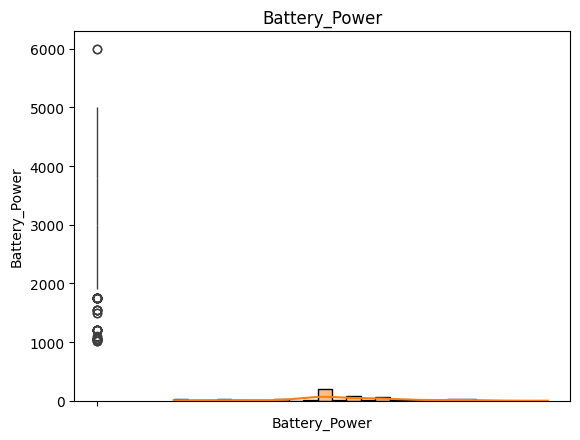

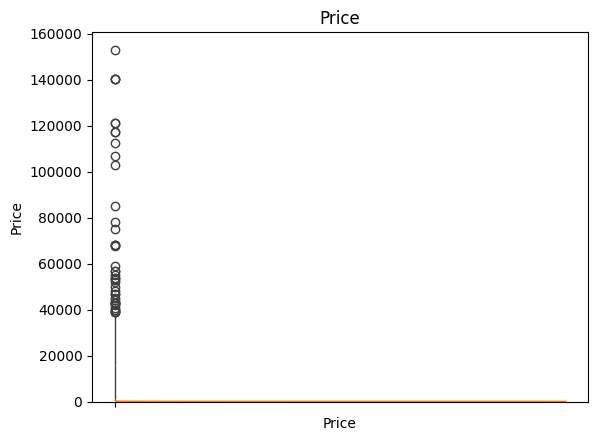

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))

for col in numerical:
    sns.boxplot(data[col])
    plt.title(col)
    sns.histplot(data[col], kde=True)
    plt.show()

In [19]:
corr = data.corr()
corr.shape

(8, 8)

<Axes: >

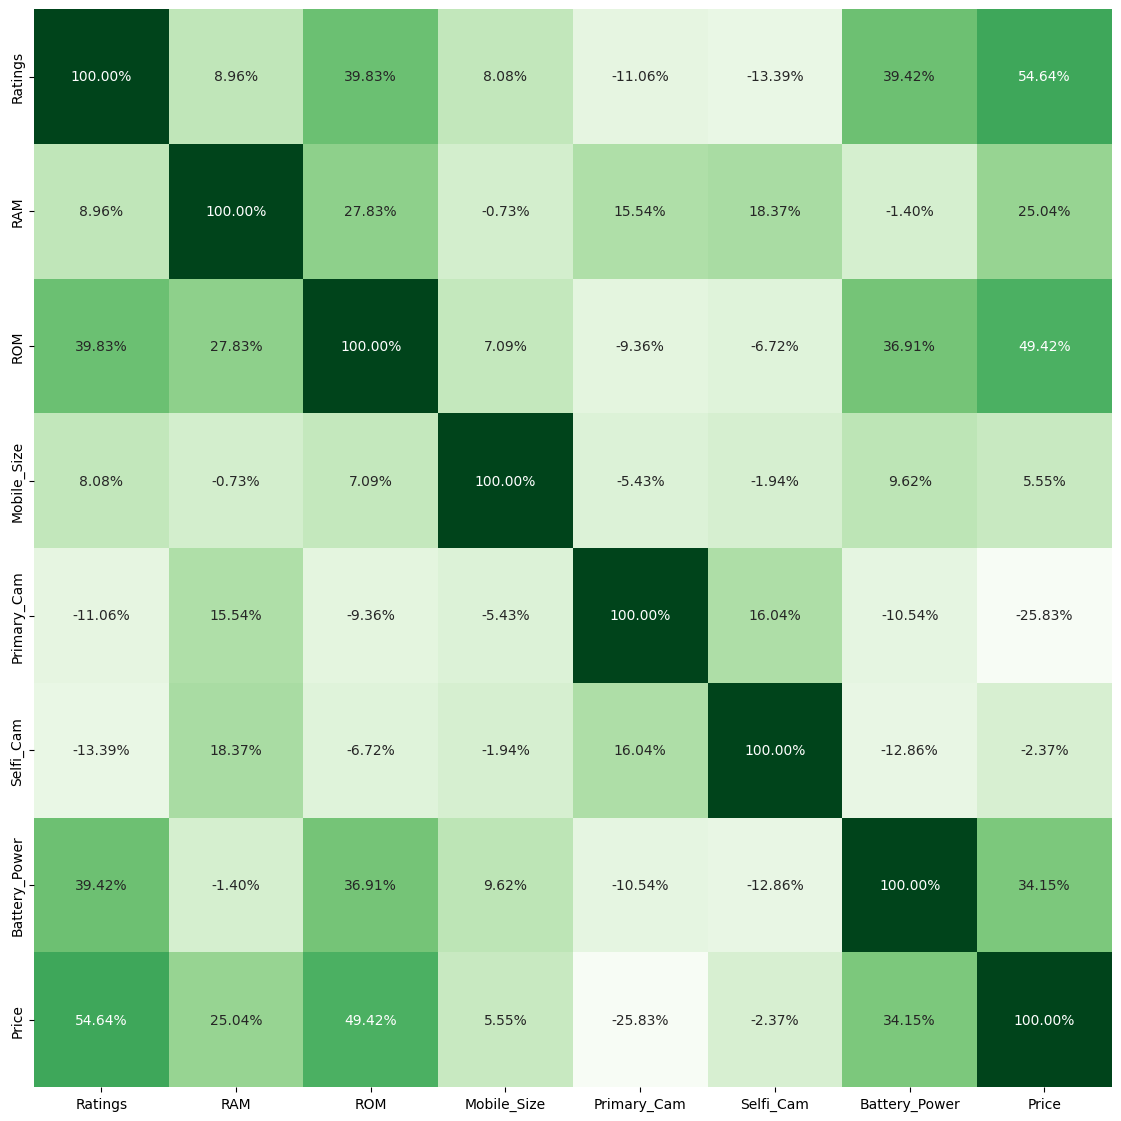

In [22]:
# Plotting the heatmap of correlation between features
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar=False, square=True, fmt='.2%', annot=True, cmap='Greens')


<Axes: >

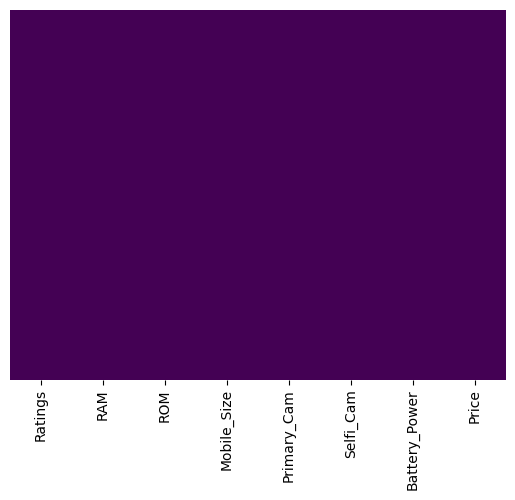

In [25]:
# Checking the null values using heatmap
# There is any null values are occupyed here
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')


<Axes: xlabel='Ratings', ylabel='count'>

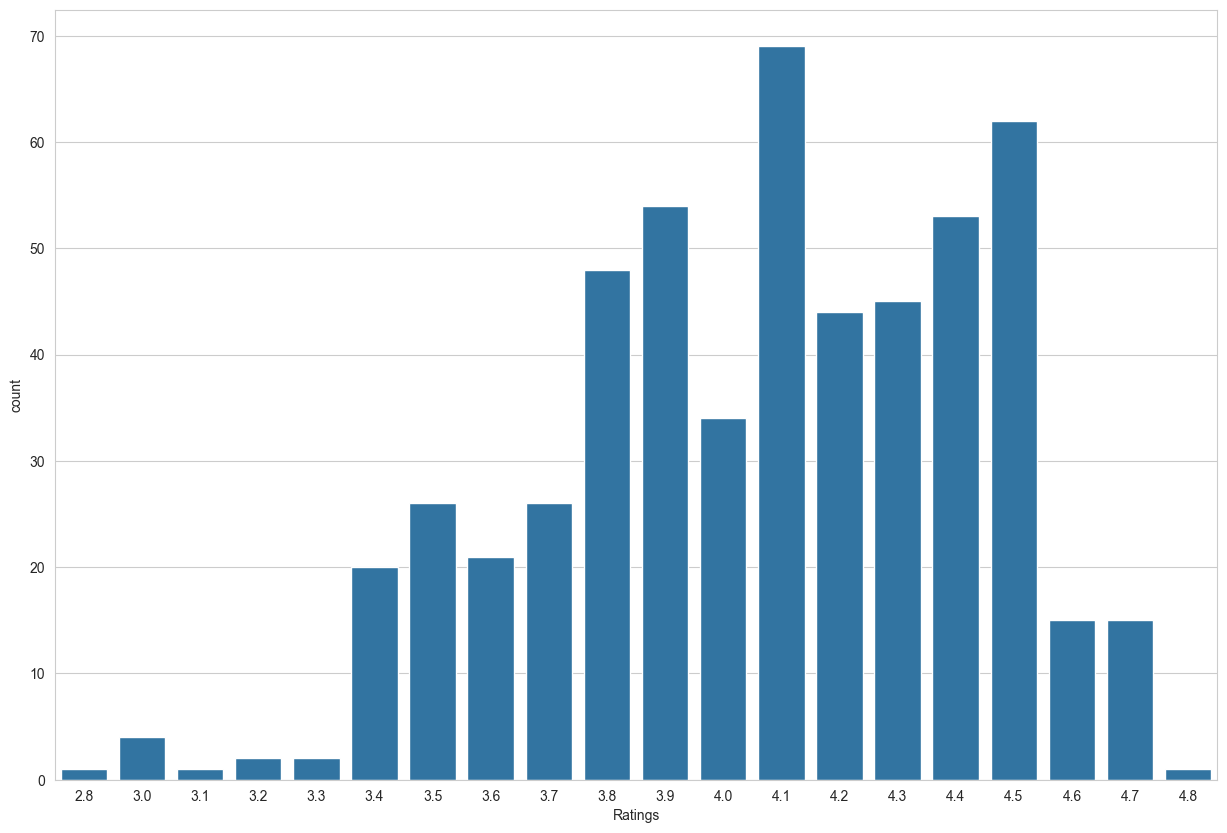

In [26]:

plt.figure(figsize=(15, 10))
sns.set_style('whitegrid')
sns.countplot(x='Ratings', data=data)

<Axes: xlabel='RAM', ylabel='count'>

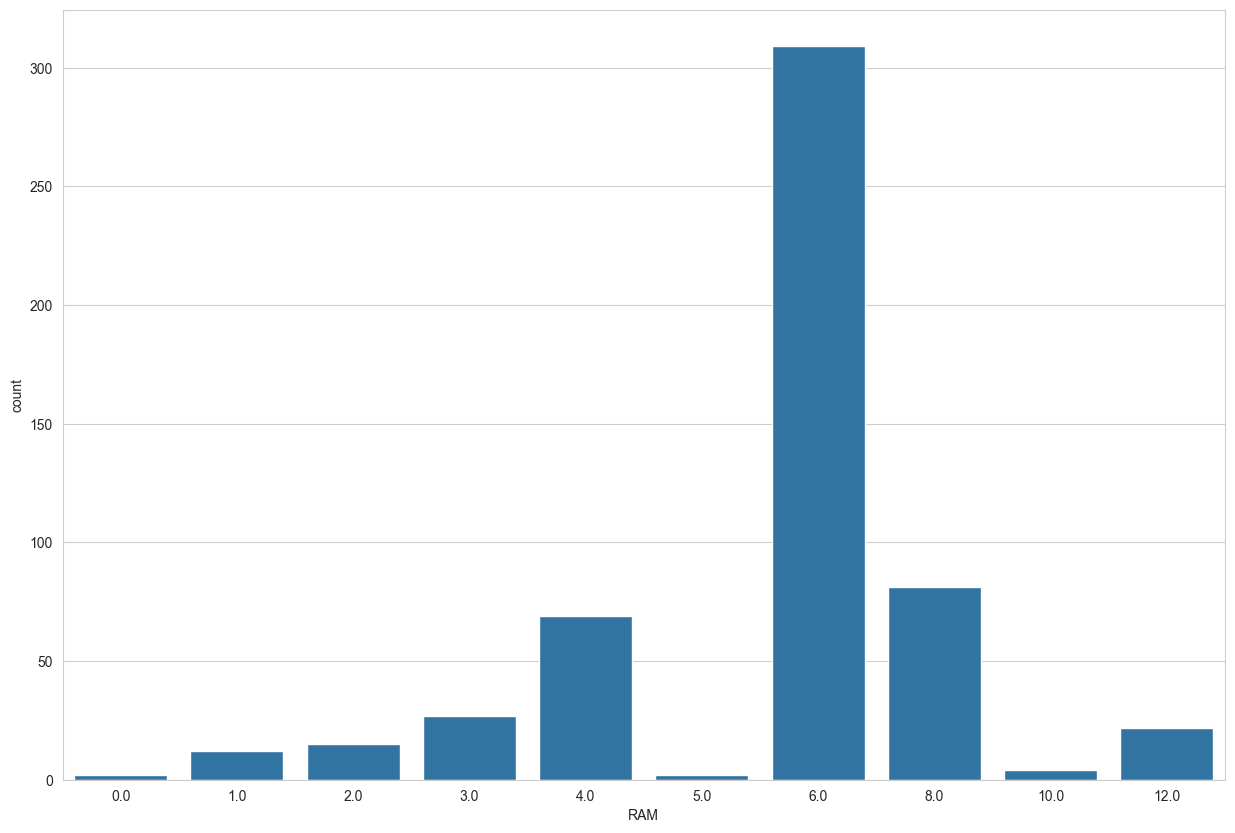

In [28]:
plt.figure(figsize=(15,10))
sns.set_style('whitegrid')
sns.countplot(x='RAM',data=data)

<Axes: xlabel='Selfi_Cam', ylabel='count'>

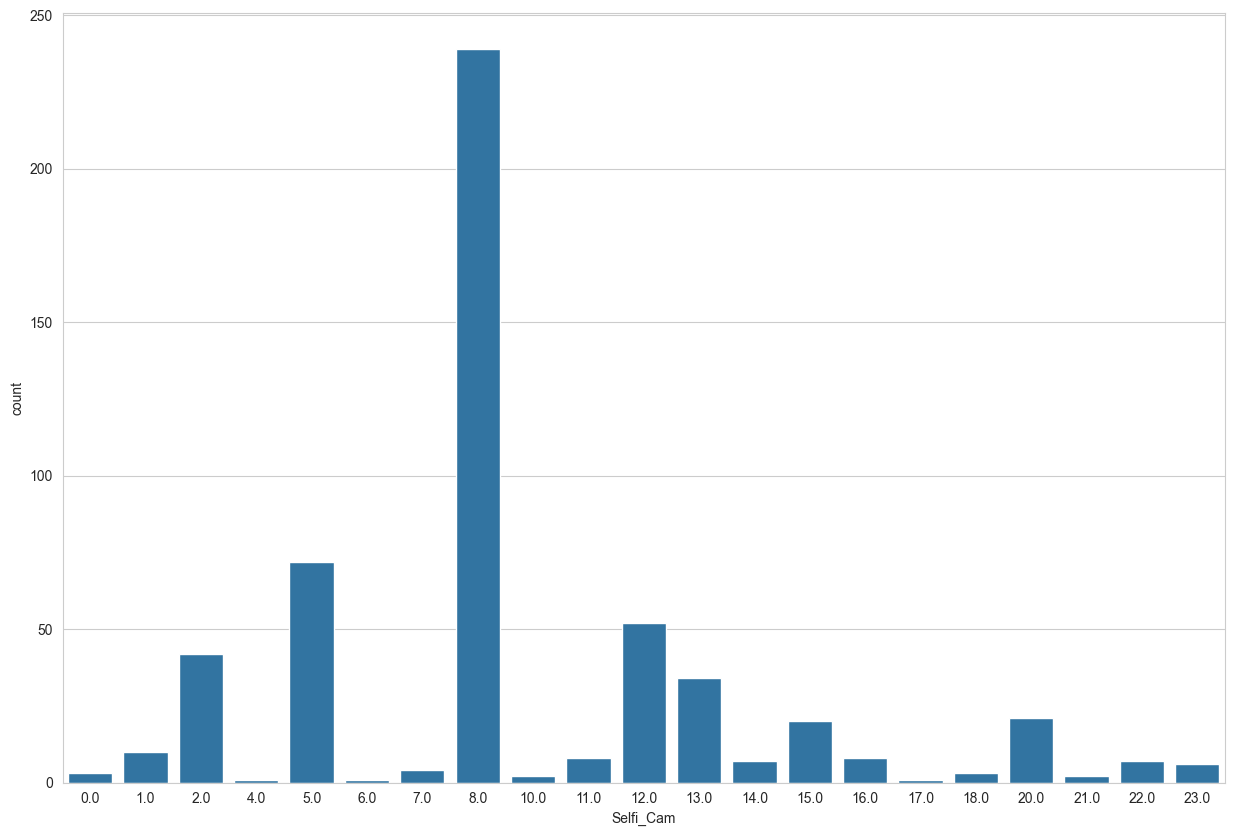

In [35]:
plt.figure(figsize=(15,10))
sns.set_style('whitegrid')
sns.countplot(x='Selfi_Cam',data=data)

# for i in data.columns:
    # plt.figure(figsize=(15,10))
    # sns.set_style()
    # sns.countplot(x=i,data=data)

<Axes: xlabel='RAM', ylabel='Count'>

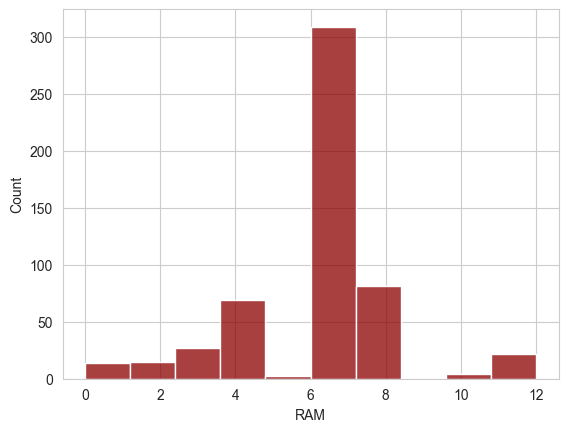

In [34]:


sns.histplot(data['RAM'].dropna(), kde=False, color='darkred', bins=10)


<Axes: xlabel='Battery_Power', ylabel='Count'>

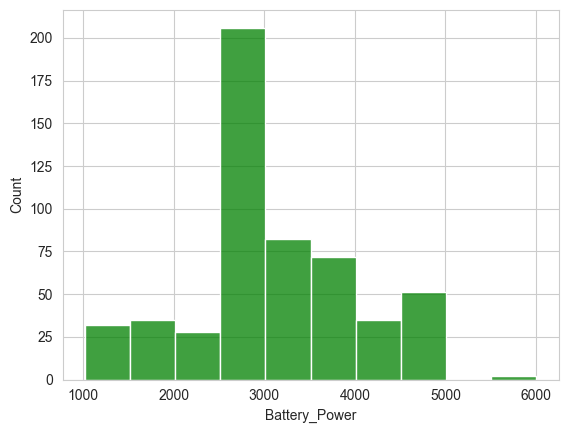

In [42]:
sns.histplot(data['Battery_Power'].dropna(),kde=False,color='green',bins=10)

<Axes: xlabel='Price', ylabel='Count'>

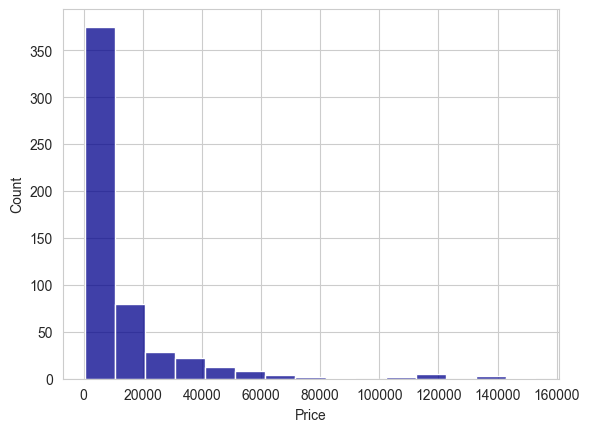

In [43]:
sns.histplot(data['Price'].dropna(),kde=False,color='darkblue',bins=15)

<Axes: xlabel='Battery_Power', ylabel='Count'>

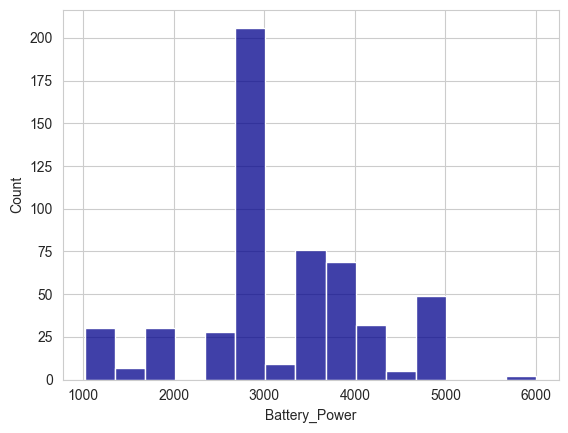

In [44]:
sns.histplot(data['Battery_Power'].dropna(),kde=False,color='darkblue',bins=15)

<Figure size 1000x1000 with 0 Axes>

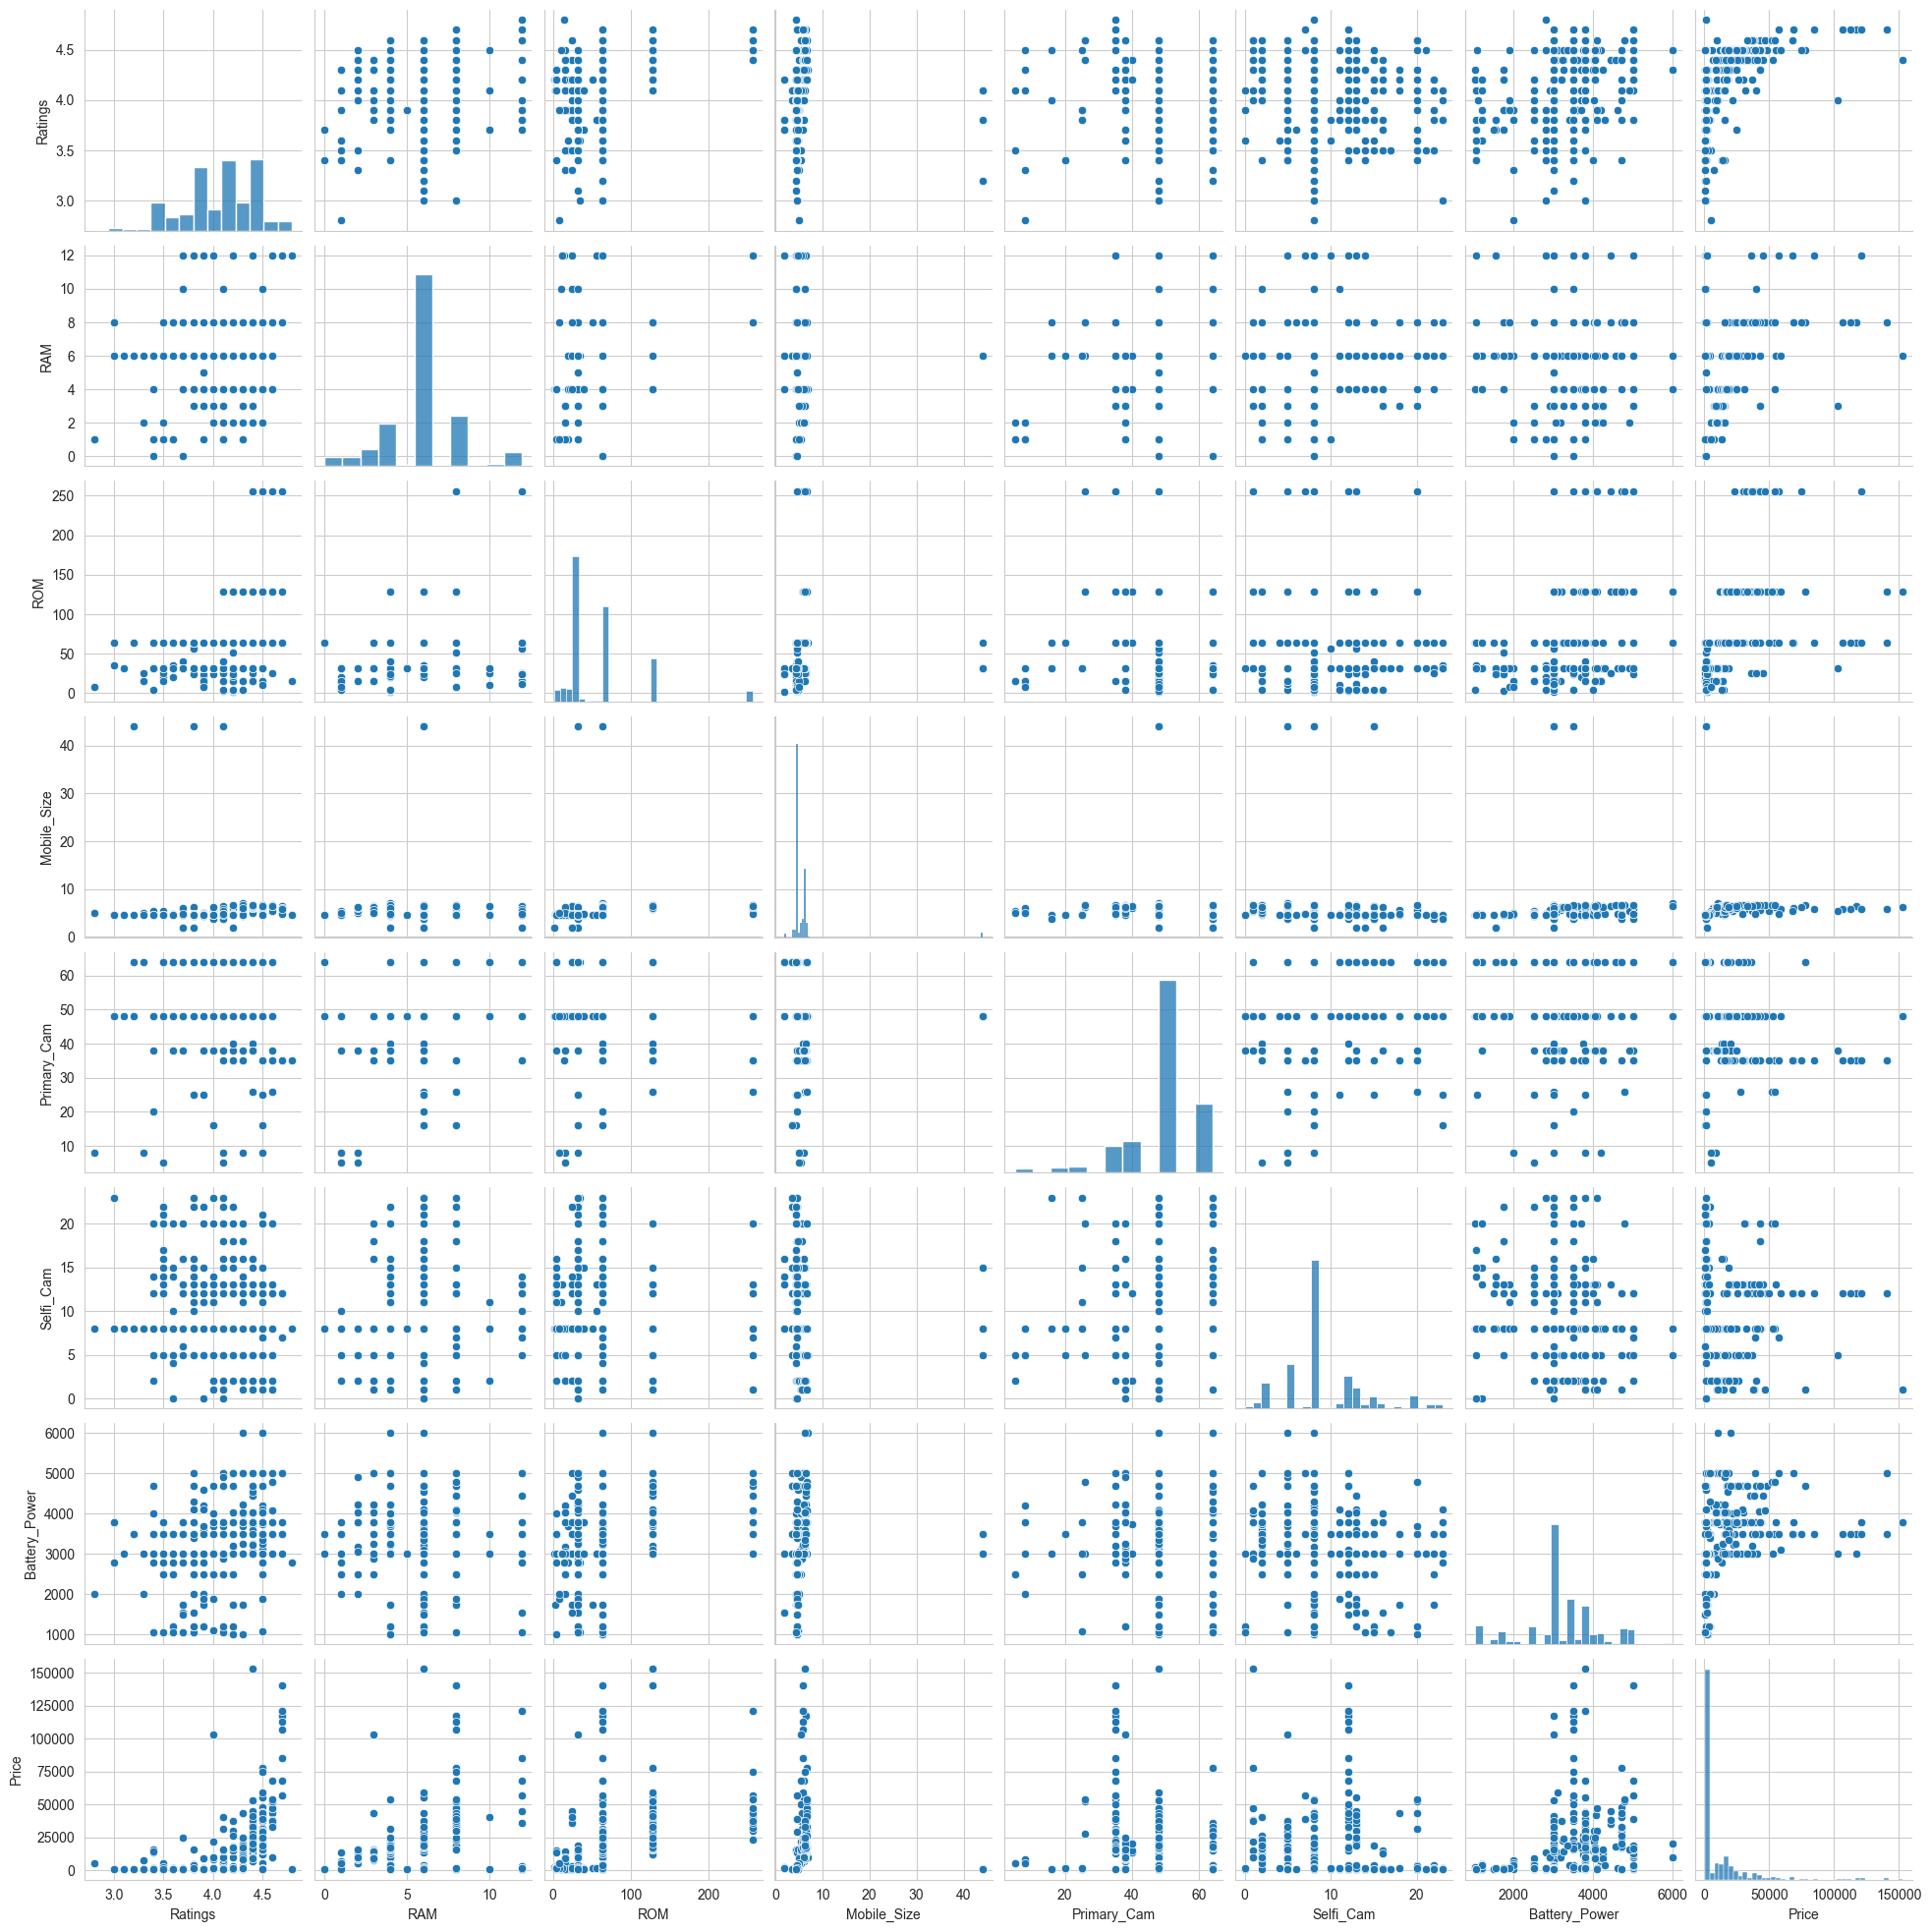

In [45]:
plt.figure(figsize=(10,10))
sns.pairplot(data=data)

In [46]:
## Feature Selection

In [52]:
# Lets try to understand which are important feature for this dataset
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [65]:
X = data.iloc[:,0:7] # Independent columns
y = data.iloc[:,[-1]] # Y target column i.e price range

In [66]:
X.head()

,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power
0,4.3,4.0,128.0,6.00,48,13.0,4000
1,3.4,6.0,64.0,4.50,48,12.0,4000
2,4.3,4.0,4.0,4.50,64,16.0,4000
3,4.4,6.0,64.0,6.40,48,15.0,3800
4,4.5,6.0,128.0,6.18,35,15.0,3800


In [59]:
y

,Price
0,24999
1,15999
2,15000
3,18999
4,18999
...,...
781,1390
795,3580
796,1080
802,1299


In [67]:
# Apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=4)
fit = bestfeatures.fit(X,y)

### `Variance Threshold`:
- Features selector that removes all low-variance features.
- This features selection algorithm looks only at the features(X) , not the desired output(Y) and can thus be used for unsupervised learning .


In [68]:
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(X)


VarianceThreshold(threshold=0)

In [69]:
var_thres.get_support() # It will return the columns which are having variance more than 0

array([ True,  True,  True,  True,  True,  True,  True])

In [73]:
#data.columns[var_thres.get_support()]
#data = data[data.columns[var_thres.get_support()]]
constant_columns = [column for column in X.columns if column not in X.columns[var_thres.get_support()]]

In [76]:
print(len(constant_columns)) #drop these columns

0


### 2. Feature selection with correlation:
- In this step we will be removing the features which are hiighly correlated 


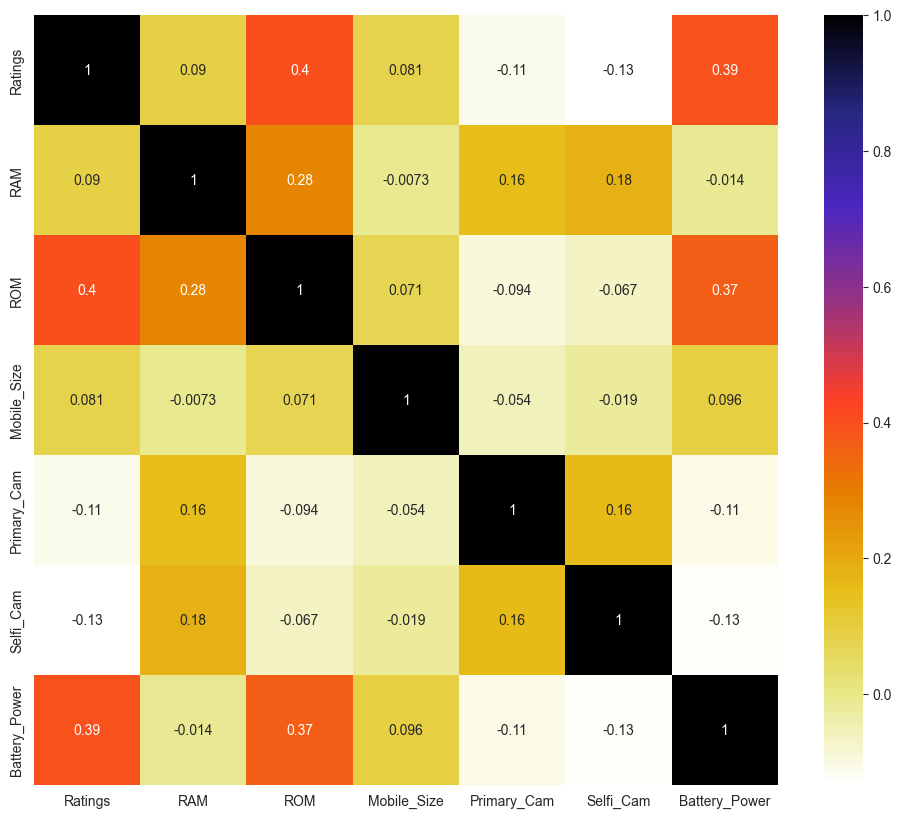

In [77]:
import seaborn as sns   
# Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [78]:
X.corr()

,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power
Ratings,1.000000,0.089589,0.398337,0.080793,-0.110556,-0.133857,0.394250
RAM,0.089589,1.000000,0.278292,-0.007347,0.155372,0.183688,-0.014006
ROM,0.398337,0.278292,1.000000,0.070949,-0.093557,-0.067220,0.369077
Mobile_Size,0.080793,-0.007347,0.070949,1.000000,-0.054255,-0.019447,0.096197
Primary_Cam,-0.110556,0.155372,-0.093557,-0.054255,1.000000,0.160434,-0.105356
Selfi_Cam,-0.133857,0.183688,-0.067220,-0.019447,0.160434,1.000000,-0.128566
Battery_Power,0.394250,-0.014006,0.369077,0.096197,-0.105356,-0.128566,1.000000


In [86]:
# With the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [87]:
len(correlation(X, 0.7))

0

In [88]:
corr_features = correlation(X, 0.7) #Drop these columns

3. Features Selection -Information Gain - mutual_info_classif
- Mutual Information

- MI Estimate information for a discrete target variable .
- Mutual Information (MI) between two random variable is a non negative value, which measures the dependency between the variables.It is equal to zero if andd only if two random variable are independent and higher values mean higher dependency.
- The function relies on nonparametric based on entropy estimation from k-nearest neighbors distances.
- A quantity called mutual information measures the amount of information one can obtain from one random variable given another.


In [90]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X, y)
mutual_info

array([1.76384802, 1.85597587, 1.62982248, 1.70764613, 1.99247126,
       0.63843662, 0.8982896 ])

In [91]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X.columns
mutual_info.sort_values(ascending=False)


Primary_Cam      1.992471
RAM              1.855976
Ratings          1.763848
Mobile_Size      1.707646
ROM              1.629822
Battery_Power    0.898290
Selfi_Cam        0.638437
dtype: float64

In [97]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=4)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)    
dfcolumns = pd.DataFrame(X.columns)



#concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features



           Specs         Score
6  Battery_Power  94367.340421
2            ROM  18199.213951
4    Primary_Cam    900.450911
3    Mobile_Size    805.114060
5      Selfi_Cam    692.744153
1            RAM    291.276269
0        Ratings     13.443676


## Feature Importance

[0.19155786 0.08884847 0.09215099 0.21015124 0.07806534 0.16913713
 0.17008897]


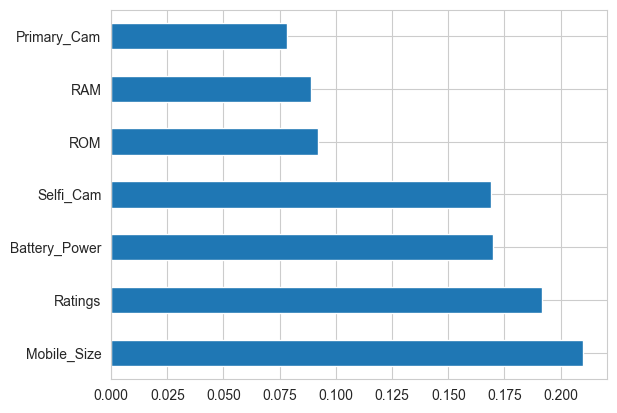

In [96]:

# Feature Importance
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()